In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

from sys_pde_no_growth_no_Lmx1a_GRN import *

In [13]:
# System Params - Same for all the species
sys_params = np.zeros(2)
sys_params[0] = 2                # Hill coefficient
sys_params[1] = 0.7              # BMP(t=0)

# BMP
b_params = np.zeros(3)
b_params[0] = 0.01                  # a_b_s
b_params[1] = 100**sys_params[0]  # K_b_s (with exponent)
b_params[2] = 0.11                  # d_b

# BMP i
i_params = np.zeros(3)
i_params[0] = 9.90                  # a_i_s
i_params[1] = 0.1**sys_params[0]   # K_i_s
i_params[2] = 0.534                 # d_i

# pSmad
s_params = np.zeros(4)
s_params[0] = 2.81                  # a_s_b
s_params[1] = 0.300**sys_params[0]   # K_s_b
s_params[2] = 62.35**sys_params[0]   # K_s_i
s_params[3] = 1.59                   # d_s

In [14]:
# Define all the simulations params
sol_params = np.zeros(3)
sol_params[0] = 0.05 # dt 
sol_params[1] = 96/sol_params[0] # Total time, T
sol_params[2] = 1/sol_params[0] # Delta t (snapshot saving time)

In [15]:
# Get the initial conditions
b, i, s = create_IC_1(sys_params)

In [16]:
# Simulate the dynamics
data_b_time, data_i_time, data_s_time = run_and_save_sys(b, i, s, 
                    b_params, i_params, s_params, sys_params, sol_params)

In [17]:
# Experimental results
t_measured = np.array([ 0,   0.5,  0.75, 1.0,   2.0,  3.0,  4.0,  5.0,  6.0,  7.,   8.0,  24.0,  48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0])
x2_measured = np.array([0.0, 0.68, 0.77, 1.283, 1.12, 1.84, 1.37, 1.29, 1.80, 1.03, 0.96, 0.012, 0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00,  0.00])
x2_measured /= np.max(x2_measured)

In [18]:
# Plot the dynamics of all the components seperately
b_concs_t = data_b_time/np.max(data_b_time)
i_concs_t = data_i_time/np.max(data_i_time)
s_concs_t = data_s_time/np.max(data_s_time)

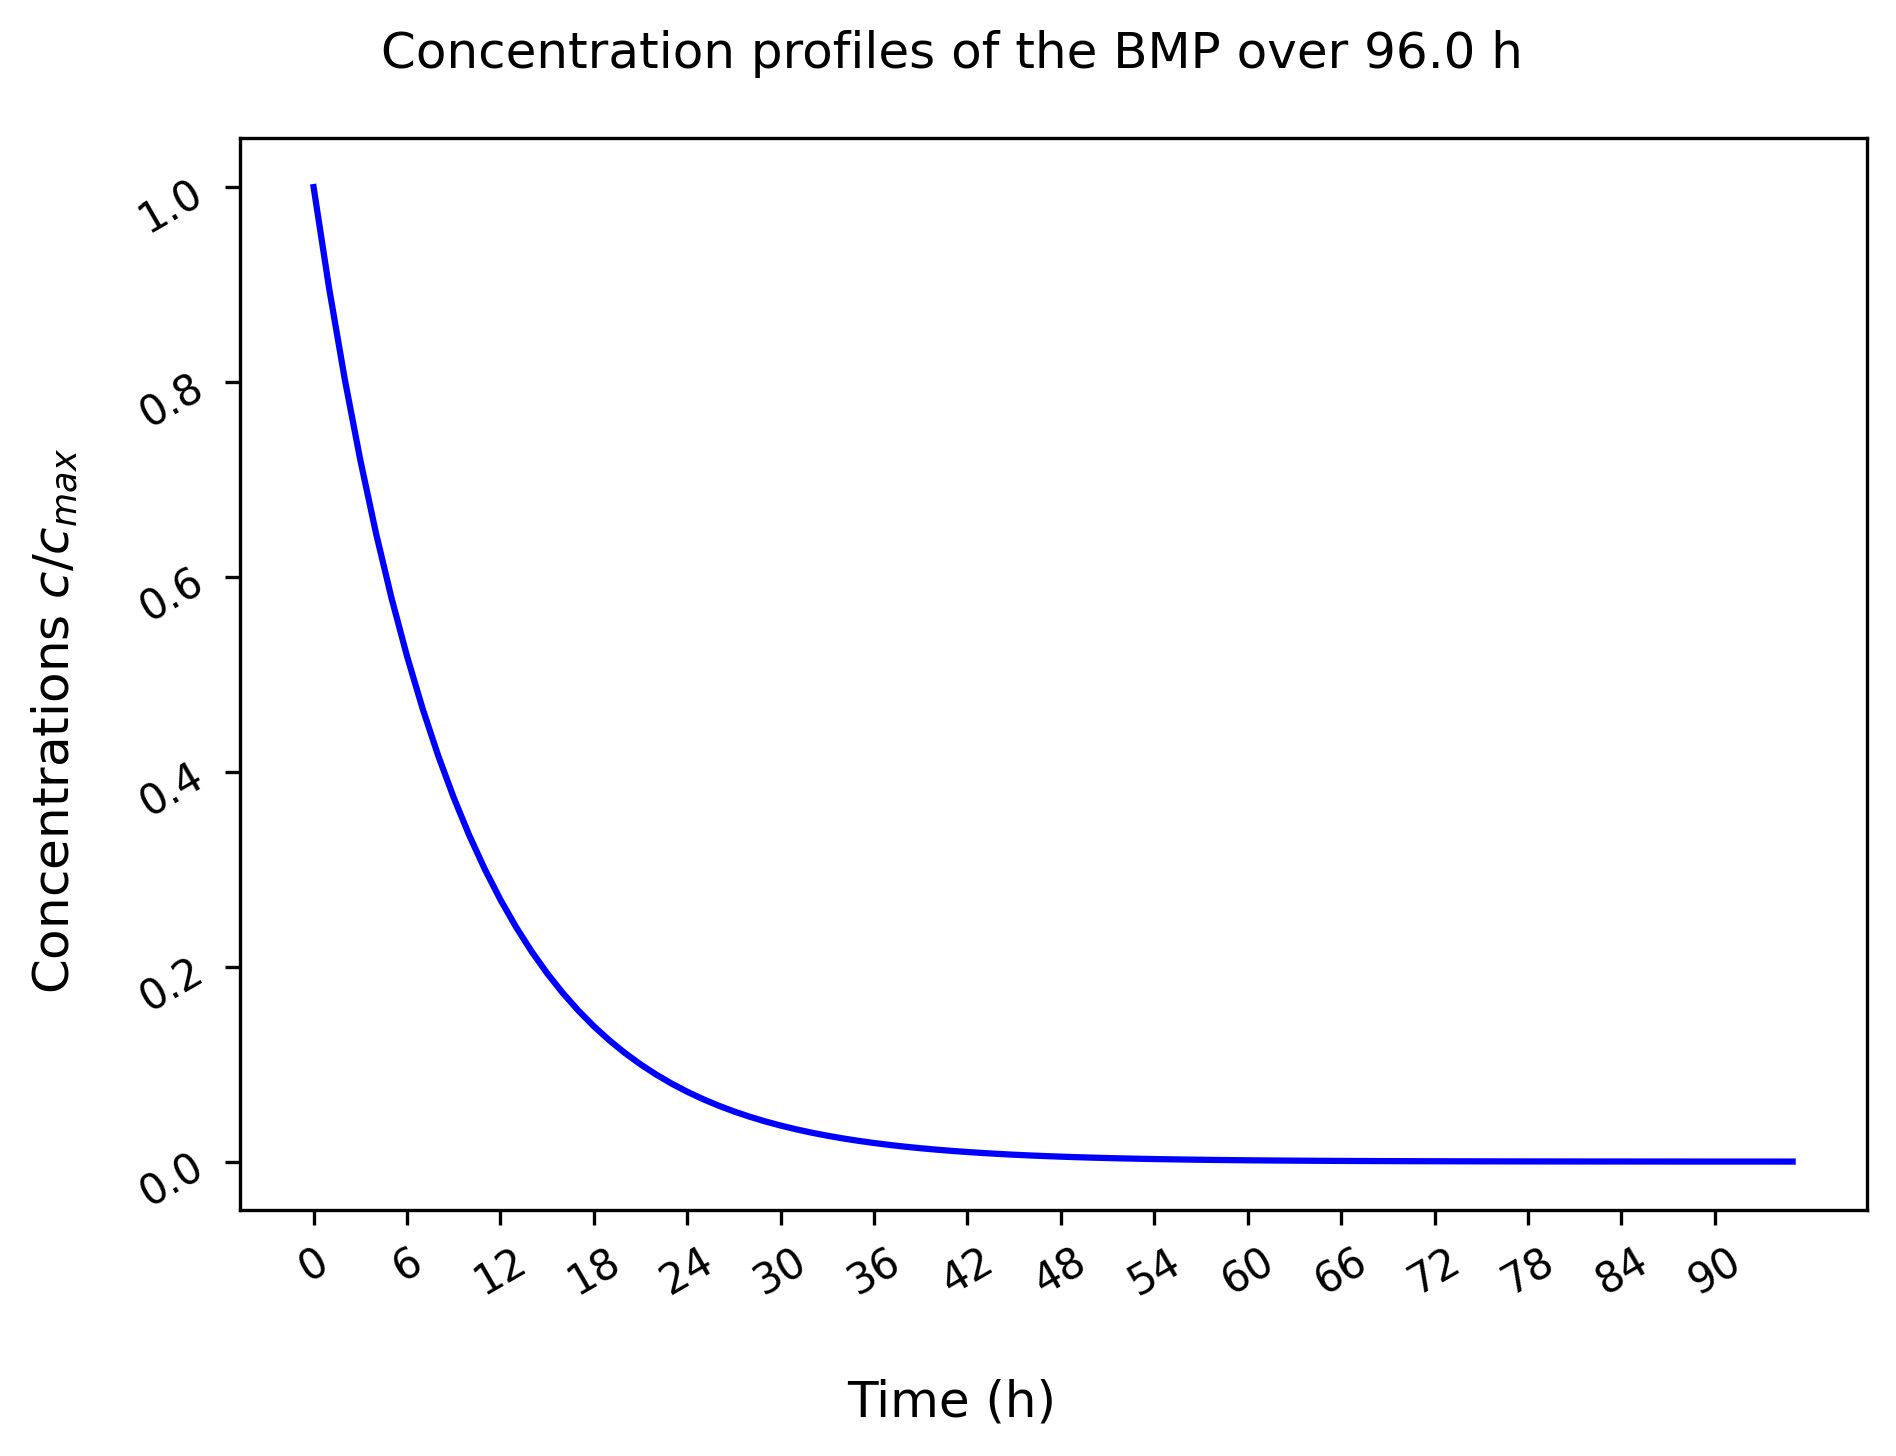

In [19]:
# Plot BMP dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_b_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], b_concs_t, color = "Blue")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the BMP over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

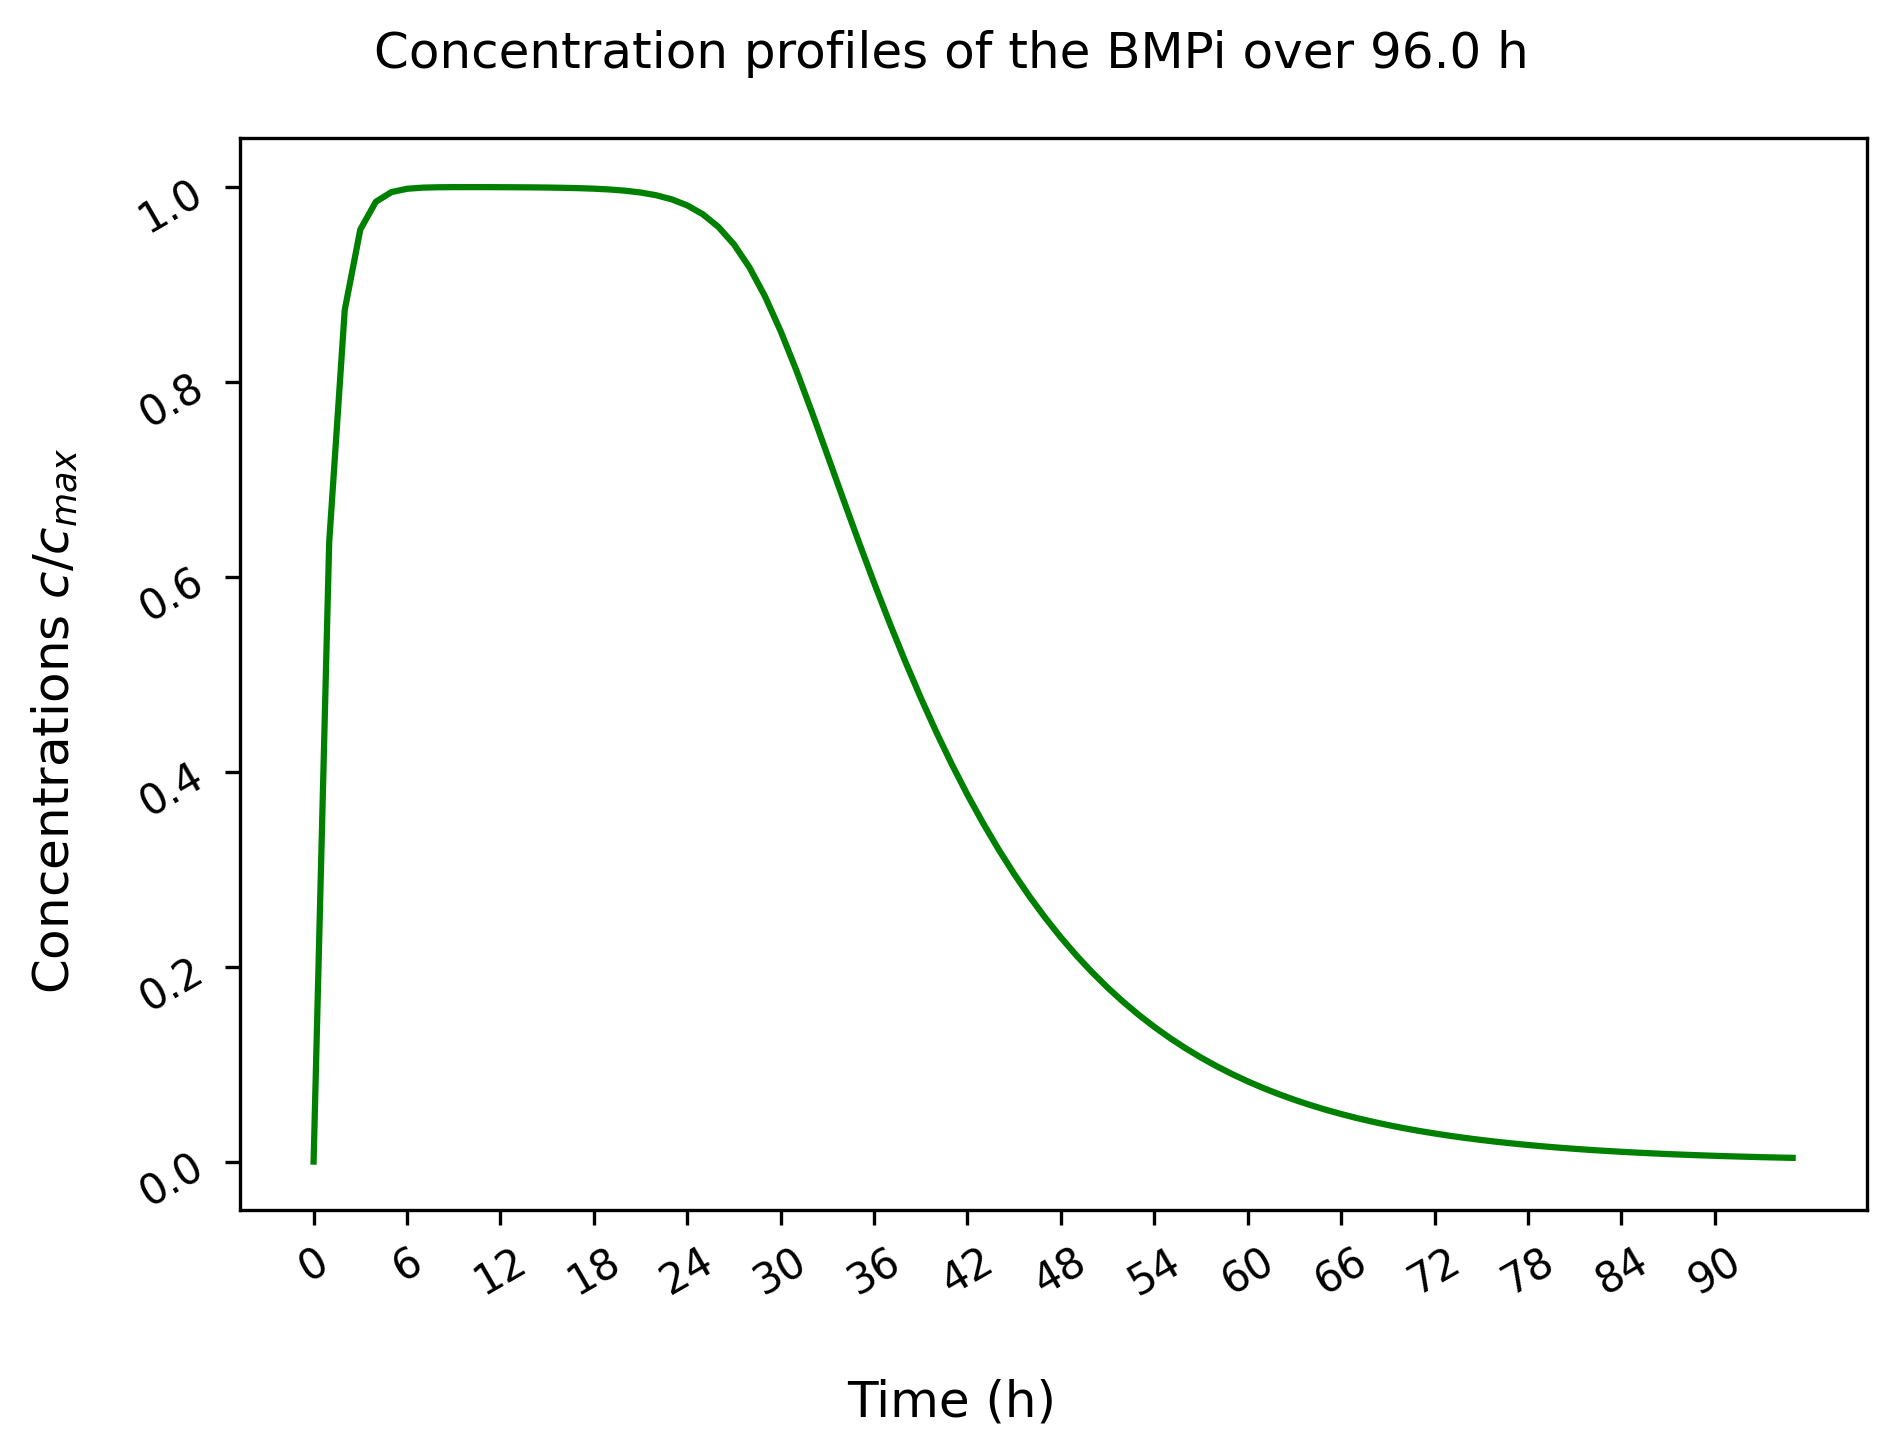

In [20]:
# Plot BMPi dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_i_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], i_concs_t, color = "Green")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the BMPi over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

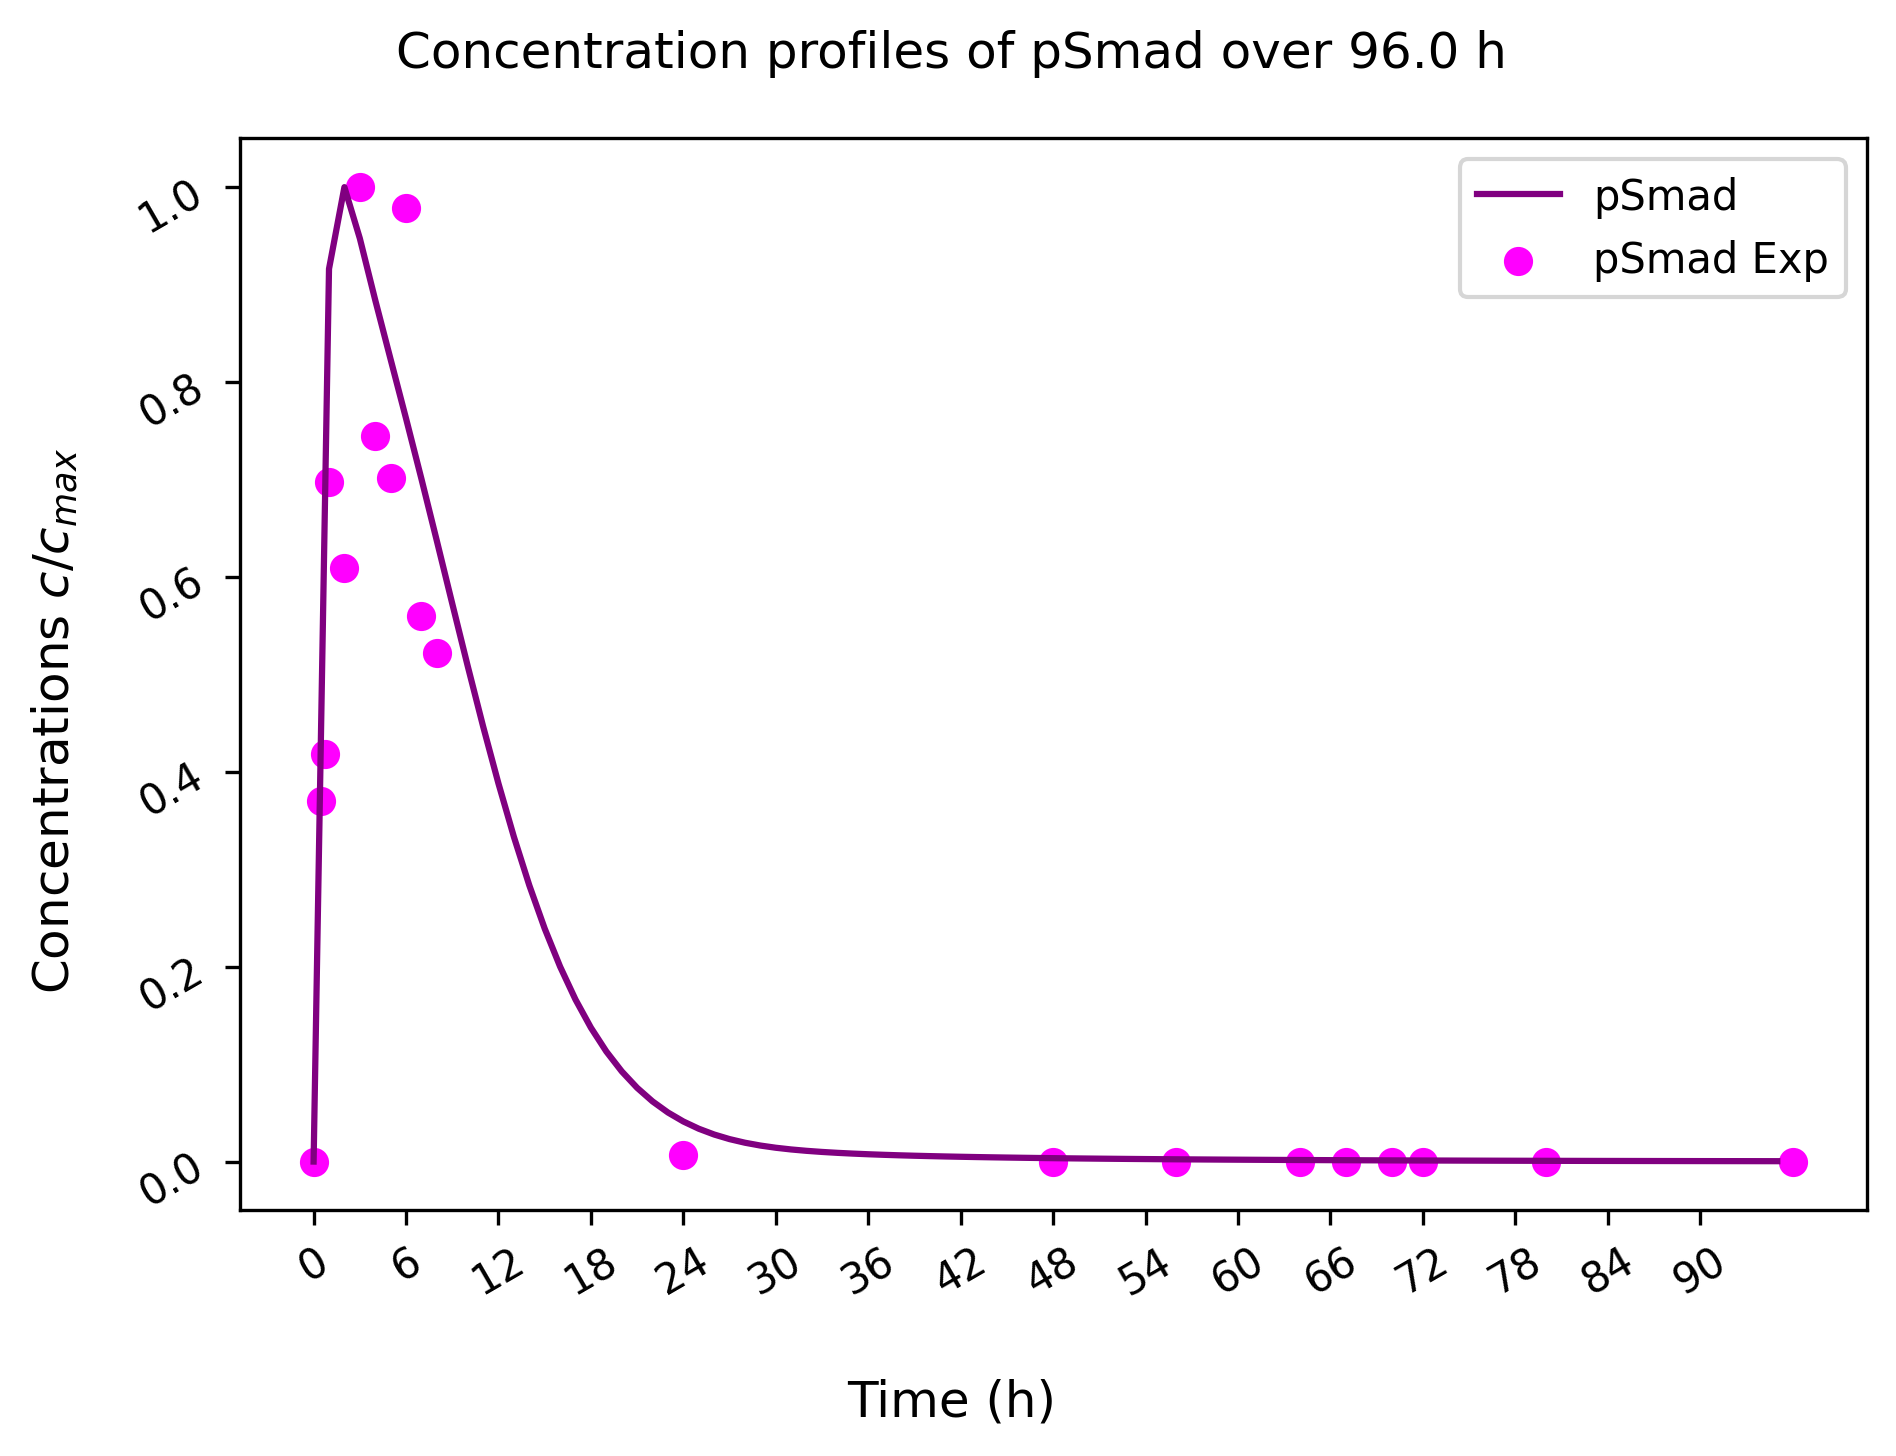

In [21]:
# Plot pSmad dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_s_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], s_concs_t, color = "Purple", label="pSmad")
axes.scatter(t_measured, x2_measured, color = "magenta", label="pSmad Exp")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

plt.legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of pSmad over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();